<a href="https://colab.research.google.com/github/ifaindrianningsih/PCVK_Genap-2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### THRESHOLDING

1. Import Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import Library

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan diatas.

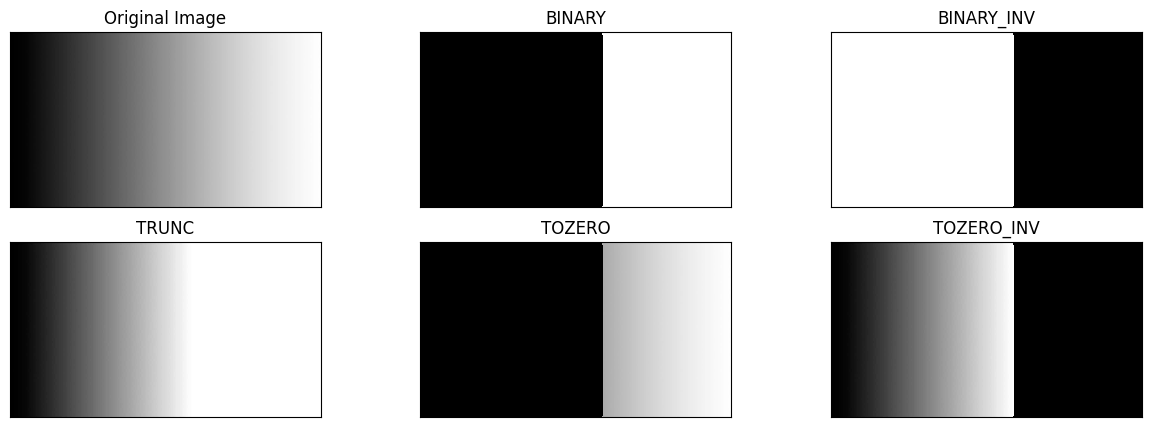

In [8]:
# Load gambar
img = cv.imread('/content/drive/MyDrive/PCVK/gradient.jpg',0)

# Metode ambang BINARY
thresh_binary = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] > 170:
            thresh_binary[i,j] = 255

# Metode ambang BINARY_INV
thresh_binary_inv = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] > 170:
            thresh_binary_inv[i,j] = 0
        else:
            thresh_binary_inv[i,j] = 255

# Metode ambang TRUNC
thresh_trunc = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] > 170:
            thresh_trunc[i,j] = 170
        else:
            thresh_trunc[i,j] = img[i,j]

# Metode ambang TOZERO
thresh_tozero = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] > 170:
            thresh_tozero[i,j] = img[i,j]
        else:
            thresh_tozero[i,j] = 0

# Metode ambang TOZERO_INV
thresh_tozero_inv = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] > 170:
            thresh_tozero_inv[i,j] = 0
        else:
            thresh_tozero_inv[i,j] = img[i,j]

# Menampilkan gambar
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray', interpolation = 'nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

4.  Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa) 

<ipython-input-11-e81d39bb6a68>:17: RuntimeWarning: invalid value encountered in true_divide
  mb = sumb / wb


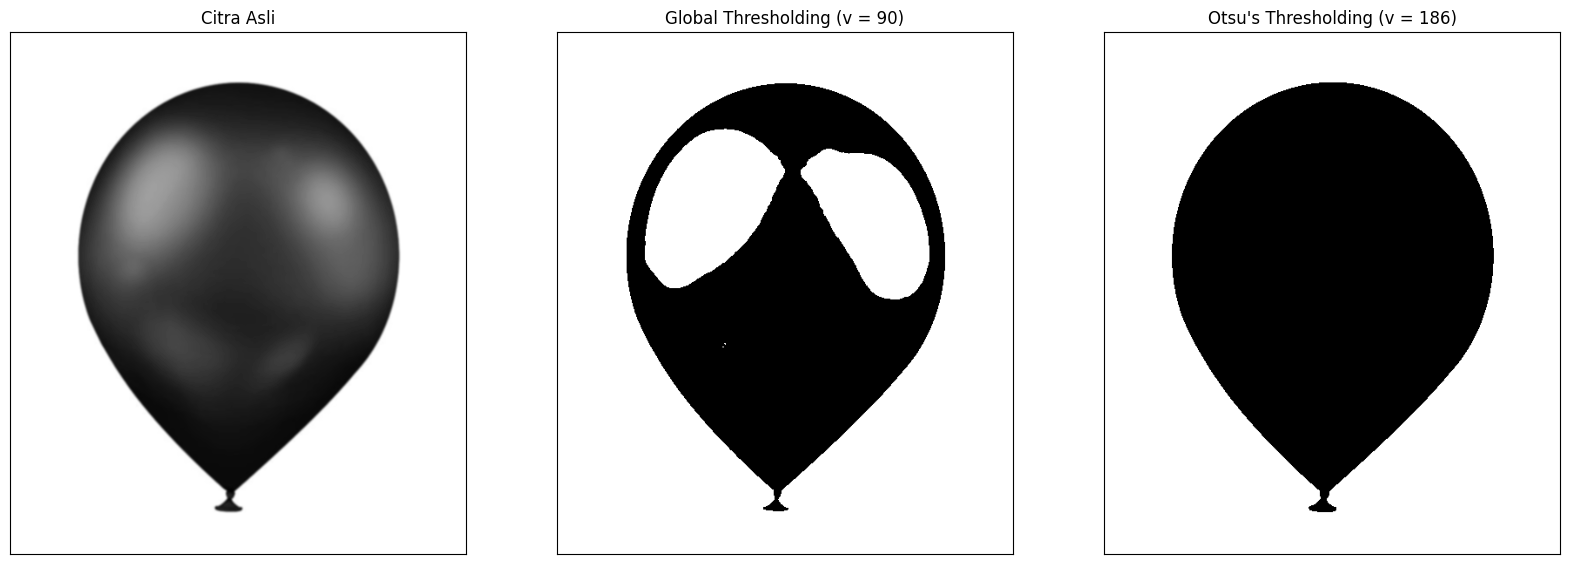

In [11]:
img = cv.imread('/content/drive/MyDrive/PCVK/balloon.jpg',0) 
blurred_img = cv. GaussianBlur (img, (5,5),0)

histogrm = cv.calcHist([blurred_img],[0],None,[256], [0,256]) 
hist_norm = histogrm.ravel()/histogrm.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
variationmax = 0 
fn_min = np.inf 
thresh = -1 
for i in range(0,187):
  wb += histogrm[i] 
  wf = (img.shape[0]*img.shape[1]) - wb 
  sumb += (i*histogrm[i]) 
  mb = sumb / wb 
  mf = (sumb - sumb)/wf 
  varbetween = wb * wf * (mb - mf) * (mb - mf) 
  if (varbetween>variationmax):
    variationmax = varbetween
    thresh = i 
x = ("Otsu's Thresholding (v = ")+str(thresh)+")" 
ret, th1 = cv.threshold(blurred_img, 90, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold (blurred_img, thresh, 255, cv. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x] 
citra3 = [blurred_img, th1, th2]

plt. figure(figsize = (20,15)) 
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray') 
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) 
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:

a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment)

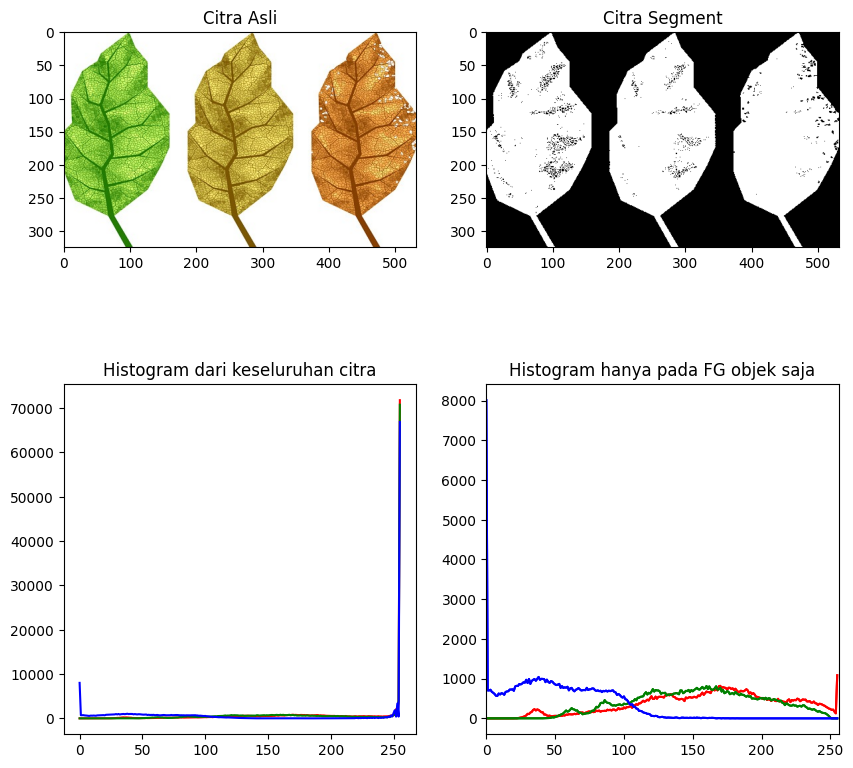

In [13]:
img = cv.imread('/content/drive/MyDrive/PCVK/tobacco.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
thresh = 200

ret,mask = cv.threshold(img_gray,thresh,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja) 

Text(0.5, 1.0, 'Yellow Segmented Image')

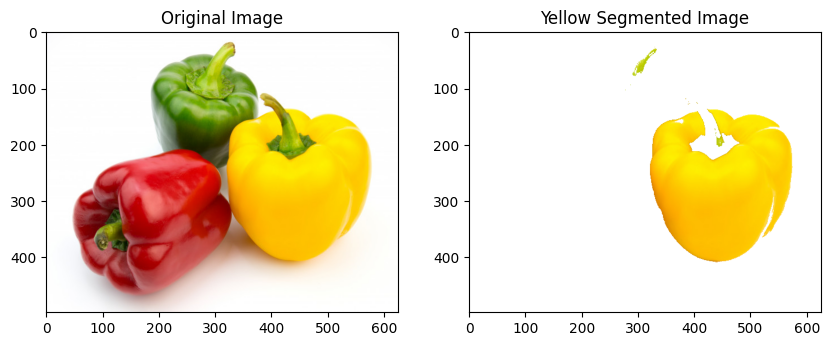

In [28]:
# Load gambar
img = cv.imread('/content/drive/MyDrive/PCVK/peppers.jpg')

# Konversi warna dari BGR ke RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Konversi gambar ke tipe data float32 untuk K-Means
img_float = np.float32(img_rgb.reshape((-1, 3)))

# Definisikan parameter K-Means
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
attempts = 10
flags = cv.KMEANS_RANDOM_CENTERS

# Menjalankan K-Means
ret, label, center = cv.kmeans(img_float, K, None, criteria, attempts, flags)

# Mengubah tipe data kembali ke uint8 dan reshape ke ukuran gambar asli
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img_rgb.shape))

# Mengambil piksel warna kuning saja
hsv = cv.cvtColor(res2, cv.COLOR_RGB2HSV)
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])
mask = cv.inRange(hsv, lower_yellow, upper_yellow)

# Menggabungkan mask dan gambar asli
result = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

# Membuat background putih
background = np.zeros_like(result)
background.fill(255)

# Menambahkan gambar ke background putih
mask_3d = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
result[mask_3d == 0] = background[mask_3d == 0]

# Menampilkan gambar
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Original Image')
plt.subplot(2,2,2),plt.imshow(result)
plt.title('Yellow Segmented Image')


7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini. 

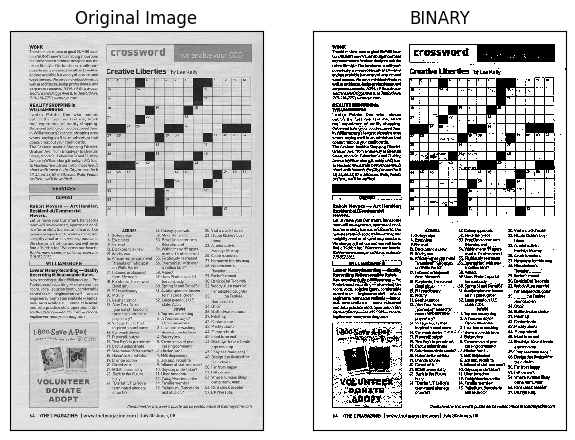

In [40]:
# Menggunakan Library
# Load Image
img = cv.imread('/content/drive/MyDrive/PCVK/crossword.jpg',0)
thresh = 200

ret, thresh1 = cv.threshold(img, thresh,255,cv.THRESH_BINARY)

titles = ['Original Image', 'BINARY']
images = [img, thresh1]

plt.figure(figsize = (15,12))

for i in range(len(images)):
  plt.subplot(2,4,i+1), plt.imshow(images[i], 'gray', interpolation = 'nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

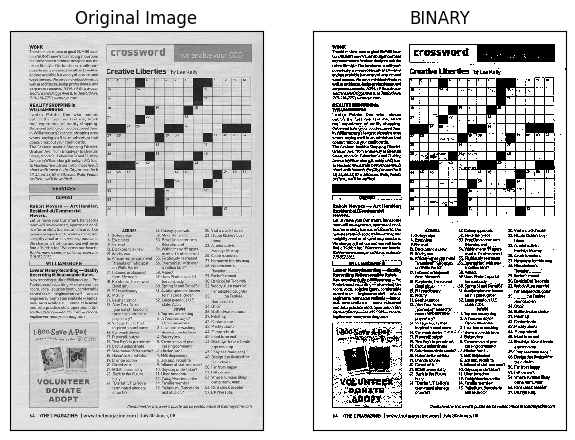

In [42]:
# Tanpa Library
# Load gambar
img = cv.imread('/content/drive/MyDrive/PCVK/crossword.jpg',0)

# Metode ambang BINARY
thresh_binary = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] > 170:
            thresh_binary[i,j] = 255

# Menampilkan gambar
titles = ['Original Image', 'BINARY']
images = [img, thresh1]

plt.figure(figsize = (15,12))

for i in range(len(images)):
  plt.subplot(2,4,i+1), plt.imshow(images[i], 'gray', interpolation = 'nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()